In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [29]:
%load_ext kedro.ipython




The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [30]:
data = catalog.load("data_final")

[10/13/25 21:14:21] INFO     Loading data from data_final (CSVDataset)...                      ]8;id=26006;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=170522;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

In [31]:
data.info()  # Ver información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200873 entries, 0 to 200872
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   dateid                200873 non-null  int64  
 1   platform              200873 non-null  int64  
 2   gamemode              200873 non-null  int64  
 3   mapname               200873 non-null  int64  
 4   matchid               200873 non-null  int64  
 5   roundnumber           200873 non-null  int64  
 6   objectivelocation     200873 non-null  int64  
 7   winrole               200873 non-null  int64  
 8   endroundreason        200873 non-null  int64  
 9   roundduration         200873 non-null  int64  
 10  clearancelevel        200873 non-null  int64  
 11  skillrank             200873 non-null  int64  
 12  role                  200873 non-null  int64  
 13  team                  200873 non-null  int64  
 14  haswon                200873 non-null  int64  
 15  

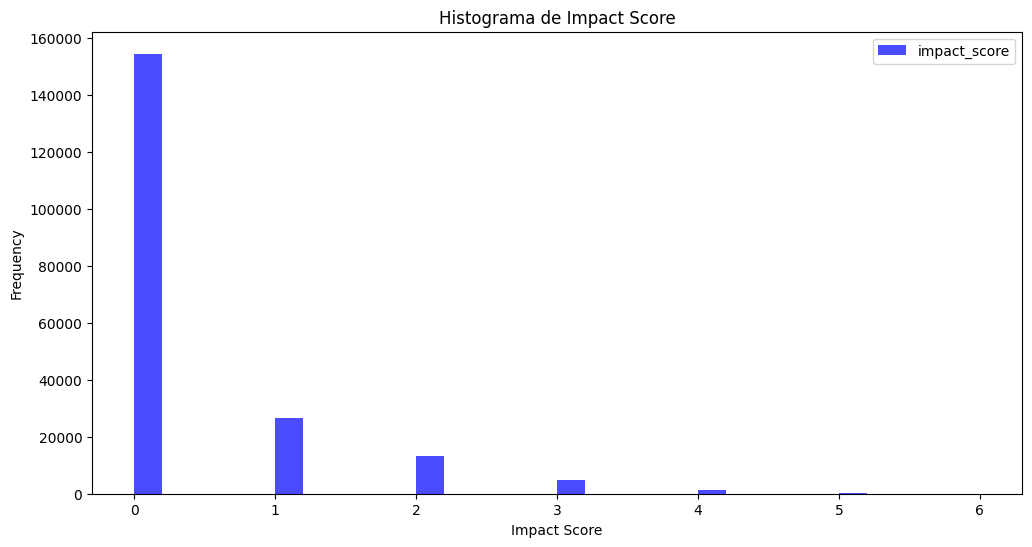

In [35]:
import matplotlib.pyplot as plt

# Histograma de impact_score
plt.figure(figsize=(12, 6))
plt.hist(data['impact_score'], bins=30, alpha=0.7, label='impact_score', color='blue')
plt.xlabel('Impact Score')
plt.ylabel('Frequency')
plt.title('Histograma de Impact Score')
plt.legend()
plt.show()



In [34]:
print("Valor máximo de la variable predictoria (impact_score):", data['impact_score'].max())

Valor máximo de la variable predictoria (impact_score): 6


In [ ]:


X = data[['nbkills']]  # Dobles corchetes para obtener DataFrame (2D)
y = data['impact_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# 🔹 Evaluación del modelo
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Calcular RMSE manualmente

mae = mean_absolute_error(y_test, y_pred)

print(f"📊 Regresión Lineal Simple: impact_score ~ nbkills")
print(f"=" * 50)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"=" * 50)

# Mostrar la ecuación de la regresión
coef = model.coef_[0]
intercept = model.intercept_
print(f"Ecuación: impact_score = {coef:.4f} * nbkills + {intercept:.4f}")

# Interpretación del R²
if r2 > 0.7:
    print("✅ Modelo con buen ajuste (R² > 0.7)")
elif r2 > 0.5:
    print("⚠️ Modelo con ajuste moderado (R² > 0.5)")
else:
    print("❌ Modelo con ajuste pobre (R² < 0.5)")

📊 Regresión Lineal Simple: impact_score ~ nbkills
Mean Squared Error (MSE): 0.2238
Mean Absolute Error (MAE): 0.2812
Root Mean Squared Error (RMSE): 0.4731
R² Score: 0.6334
Ecuación: impact_score = 0.7305 * nbkills + -0.0469
⚠️ Modelo con ajuste moderado (R² > 0.5)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir el modelo base
lr = LinearRegression()

# Definir el espacio de hiperparámetros (para regresión lineal, solo 'fit_intercept' y 'normalize' suelen ser relevantes)
param_grid = {
    'fit_intercept': [True, False]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Ajustar el GridSearchCV
grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros encontrados:", grid_search.best_params_)
print("Mejor puntuación (neg MSE):", grid_search.best_score_)

#### resultado: 

- Mean Squared Error (MSE): 0.2238
- Mean Absolute Error (MAE): 0.2812
- Root Mean Squared Error (RMSE): 0.4731
- R² Score: 0.6334


#### observacion:

